In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as const
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
#plt.rcParams['text.usetex'] = True

#Sellmeier equation
def n_squared(lamb, coeffs):
    '''lamb in µm'''
    n2 = 1
    lsquare = lamb**2
    for index in range(3):
        n2 = n2 + coeffs[index, 0]*lsquare/(lsquare-coeffs[index, 1]**2)
    return n2

#Lensmaker equation
def lensmaker(n, R1, R2, d=0):
    '''Returns 1/focal length'''
    f_inv = (n-1)*(1/R1 - 1/R2 + (n-1)*d/(n*R1*R2))
    return f_inv


def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge



#https://refractiveindex.info/?shelf=glass&book=fused_silica&page=Malitson
#Maltison 1965 UV fused silica: 0.21 µm - 3.71 µm
coeffsUVFS = np.array([[0.6961663, 0.0684043], [0.4079426, 0.1162414], [0.8974794, 9.896161]])

#Energy range is 1.3 eV to 5 eV in .1 eV steps
energies = np.linspace(1.3, 5, 37)*const.elementary_charge
wavs = const.h*const.c/energies


fig1, axs1 = plt.subplots(1,1, layout='constrained', figsize = plotHelperLatex.figSizer(1, 2.2), dpi = 144)
#fig2, axs2 = plt.subplots(1,1, layout='constrained', figsize = (6,4), dpi=200)
#µm for sellmeier
n_wav = np.sqrt(n_squared(wavs*1e6, coeffsUVFS))
axs1.plot(wavs*1e9, n_wav)
axs1.set_ylabel('n / 1')
axs1.set_xlabel(r'$\lambda$ / nm')
axs1.set_xticks(np.arange(250, 951, 100))
secax0 = axs1.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax0.set_xticks([1.5, 2, 3, 4, 5])
secax0.set_xlabel("E / eV")

#second part with focal distance
R1 = 59.5
yaxisNtoF = lambda n_in: -1/lensmaker(n_in, np.inf, R1)
#only for the particular case of plano conves
yaxisFtoN = lambda f_in: (1+R1/f_in)

print(yaxisNtoF(yaxisFtoN(100)))
focal_distance = -lensmaker(n_wav, np.inf, R1)
focal_distance = 1/focal_distance
#axs1.plot(wavs*1e9, yaxisFtoN(focal_distance), 'r')
#axs1.set_ylabel('f / mm')
#axs1.set_xlabel(r'$\lambda$ / nm')
#axs1.set_xticks(np.arange(250, 951, 100))



secax1 = axs1.secondary_yaxis('right', functions=(yaxisNtoF, yaxisFtoN))
#secax1.set_xticks([1.5, 2, 3, 4, 5])
secax1.set_ylabel('f / mm')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import plotHelperLatex
plotHelperLatex.setMatplotSettings()

#taken from edmund optics: Laser Optics and Resource Guide Section 2: Gaussian Beam Propagation

w_c = lambda w0, lamb, z: w0*np.sqrt(1+(lamb*z/(np.pi*w0**2))**2)
w0_c = lambda lamb, theta: lamb/np.pi/theta
zr_c = lambda lamb, w0: np.pi*w0**2/lamb

#collimated beam through lens with focal distance f
#taken from angular aperture
theta_c = lambda D, f: np.arctan(D/(2*f))



wav = 653e-9 # nm
#https://refractiveindex.info/?shelf=glass&book=fused_silica&page=Malitson
#Maltison 1965 UV fused silica: 0.21 µm - 3.71 µm
coeffsUVFS = np.array([[0.6961663, 0.0684043], [0.4079426, 0.1162414], [0.8974794, 9.896161]])
n = np.sqrt(n_squared(wav*1e6,coeffsUVFS))
f = 1/lensmaker(n, 59.4, np.inf)*1e-3

diameters = np.array([1, 2, 3, 4])*1e-3 # mm
thet = theta_c(diameters, f)
w0 = w0_c(wav, thet)
#print(w0*2)

zr = zr_c(wav, w0[1])

z = np.linspace(-5e-4, zr/2, 200)


#plt.tight_layout()

fig1, axs1 = plt.subplots(1,1, layout='constrained', figsize = plotHelperLatex.figSizer(2,1.4), dpi=144)
fig2, axs2 = plt.subplots(1,1, layout='constrained', figsize = plotHelperLatex.figSizer(1.6, 1.4), dpi=144)
#fig.suptitle("653 nm beam waist")
labelz = z[0]
for index in range(len(diameters)):
    axs1.plot(z*1e3, w_c(w0[index], wav, z)*2e6, label="%.1f mm" %(diameters[index]*1e3))
    axs1.text(labelz*1e3-0.65, w_c(w0[index], wav, labelz)*2e6, s="%.1f mm" %(diameters[index]*1e3), fontdict = {"fontsize": "small", "va": "center", "color": fig1.gca().lines[-1].get_color()})
axs1.set_xlabel("z / mm")
axs1.set_ylabel("beam waist / µm")
axs1.set_xlim((-1.2, 2))
axs1.yaxis.tick_right()
axs1.yaxis.set_label_position('right')



z = np.linspace(-2e-4, zr/4, 200)

labelz = z[-1]
for index in range(len(diameters)):
    axs2.plot(z*1e3, 1/(w_c(w0[index], wav, z)/w0[index])**2, label="%.1f mm" %(diameters[index]*1e3))
    axs2.text(labelz*1e3+0.01, 1/(w_c(w0[index], wav, labelz)/w0[index])**2, s="%.1f mm" %(diameters[index]*1e3), fontdict = {"fontsize": "small", "va": "center", "color": fig2.gca().lines[-1].get_color()})
axs2.set_xlabel("z / mm")
axs2.set_ylabel("relative maximum intensity / a.u.")
axs2.set_xlim((-0.3,1.1))

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import plotHelperLatex
plotHelperLatex.setMatplotSettings()

#taken from edmund optics: Laser Optics and Resource Guide Section 2: Gaussian Beam Propagation

w_c = lambda w0, lamb, z: w0*np.sqrt(1+(lamb*z/(np.pi*w0**2))**2)
w0_c = lambda lamb, theta: lamb/np.pi/theta
zr_c = lambda lamb, w0: np.pi*w0**2/lamb

#collimated beam through lens with focal distance f
#taken from angular aperture
theta_c = lambda D, f: np.arctan(D/(2*f))


dia = 2.5e-3 # m
wavs = np.array([250,300, 400, 500, 600, 700, 800, 900])*1e-9 #wavs in m
n = np.sqrt(n_squared(wav*1e6,coeffsUVFS))
f = 1/lensmaker(n, 59.4, np.inf)*1e-3
thet = theta_c(dia, f)
w0 = w0_c(wavs, thet)

zr = np.max(zr_c(wavs, w0))

z = np.linspace(-2e-4, zr/4, 200)
zlabel = z[-1]
plt.figure()
fig1, axs1 = plt.subplots(1,1, layout='constrained', figsize = plotHelperLatex.figSizer(2,1.4), dpi=144)
#plt.title("Beam waist vs wavelength behavior at 2 mm collimated waist")
for index in range(len(wavs)):
    axs1.plot(z*1e3, w_c(w0[index], wavs[index], z)*2e6, label="%.1f nm" %(wavs[index]*1e9))
    axs1.text(zlabel*1e3+0.01, w_c(w0[index], wavs[index], zlabel)*2e6, s="%.0f nm" %(wavs[index]*1e9), fontdict = {"fontsize": "small", "va": "center", "color": plt.gca().lines[-1].get_color()})
axs1.set_xlabel("z / mm")
axs1.set_ylabel("beam waist / µm")
axs1.set_xlim((-0.2, 1.05))
#plt.legend()



plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True

def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def gaussProd(x, sig1, sig2, mu1, mu2):
    mu_n = (mu1*sig2**2 + mu2*sig1**2)/(sig1**2 + sig2**2)
    sig_n = sig1*sig2/np.sqrt(sig1**2 + sig2**2)
    return 1/(np.sqrt(2*np.pi)*sig_n)*np.exp(-(x-mu_n)**2/(2*sig_n**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))



def plotVisGaussians(x, sig2, dmu):
    plt.figure()
    #probe
    plt.plot(x, gaussian(x, 1, -dmu/2), label = r"probe: $\sigma$ = 1; $\mu = %.1f$" %(-dmu/2))
    #pump
    plt.plot(x, gaussian(x, 2, +dmu/2), label = r"pump: $\sigma$ = %d; $\mu = %.1f$" %(sig2, dmu/2))
    #overlap
    plt.plot(x, gaussProd(x, 1, sig2, -dmu/2, dmu/2), "r--", label = r"overlap")
    plt.legend()
    plt.xlabel(r"x / $\sigma$")
    plt.ylabel(r"I / a.u.")
    plt.title(r"C = %.2e" %(cFactor(sig2, 1, dmu,0)))
    plt.show()

#case 1 µ1 = µ2, sig 1 >> sig 2
#
sig2 = 1 #times sig 1; sig2 is pump
dmu = 0 

x = np.linspace(-3, 3, 200)
plotVisGaussians(x, sig2, dmu)

sig2 = 2 #times sig 1
dmu = 0 

plotVisGaussians(x, sig2, dmu)

sig2 = 1
dmu = 2*np.sqrt(2*np.log(2))*sig2 #FWHM as distance
plotVisGaussians(x, sig2, dmu)


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True

def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def gaussProd(x, sig1, sig2, mu1, mu2):
    mu_n = (mu1*sig2**2 + mu2*sig1**2)/(sig1**2 + sig2**2)
    sig_n = sig1*sig2/np.sqrt(sig1**2 + sig2**2)
    return 1/(np.sqrt(2*np.pi)*sig_n)*np.exp(-(x-mu_n)**2/(2*sig_n**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))



def plotVisGaussians(x, sig2, dmu):
    plt.figure()
    #probe
    plt.plot(x, gaussian(x, 1, -dmu/2), label = r"probe: $\sigma$ = 1; $\mu = %.1f$" %(-dmu/2))
    #pump
    plt.plot(x, gaussian(x, 2, +dmu/2), label = r"pump: $\sigma$ = %d; $\mu = %.1f$" %(sig2, dmu/2))
    #overlap
    plt.plot(x, gaussProd(x, 1, sig2, -dmu/2, dmu/2), "r--", label = r"overlap")
    plt.legend()
    plt.xlabel(r"x / $\sigma$")
    plt.ylabel(r"I / a.u.")
    plt.title(r"C = %.2e" %(cFactor(sig2, 1, dmu,0)))
    plt.show()

def plotCompareGaussians(x, sigPump, dmu_vec):
    fig = plt.figure()
    #plot pump gaussian
    plt.plot(x, gaussian(x, sigPump, 0))
    for ind in range(len(dmu_vec)):
        plt.plot(x, gaussian(x, 1, dmu_vec[ind]), label="C = %.3f" %cFactor(sigPump, 1, 0, dmu_vec[ind]))

    plt.legend()
    plt.show()
    fig.clear()

#case 1 µ1 = µ2, sig 1 >> sig 2
#
sig2 = 3 #times sig 1; sig2 is pump
dmu = 0 

x = np.linspace(-3, 3, 200)
dmu = [0, 0.1, 0.3, 0.5]
sigPump = 3
plotCompareGaussians(x, sigPump, dmu*sigPump)
sigPump = 2
plotCompareGaussians(x, sigPump, dmu*sigPump)
sigPump = 1
plotCompareGaussians(x, sigPump, dmu*sigPump)



In [ ]:
#Test binning of numerical correction factor
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))

def binMap(map, xBinning, yBinning=0):
    '''N_binning means that N*N pixels are binned together\n
    only takes square z*z maps'''
    if yBinning == 0:
        yBinning = xBinning
    xBins = int(np.shape(map)[0]//xBinning) #along one axis
    yBins = int(np.shape(map)[1]//yBinning) #along one axis
    outmap = map.reshape(xBins, xBinning, yBins, yBinning).sum(3).sum(1)
    return outmap


#using identical gaussians for this
points_per_sig = 1024 #starting value 1000 points for 1 sig distance
sig = 1 #does not matter since I do binning in steps of sig at first
mu = 0
###----analytical cFactor ----###
cFactorAnalytic = cFactor(sig, sig, mu, mu)**2
print("Analytic correction factor:\n " + str(cFactorAnalytic))
###----numeric cFactor ----###
nsig = 5 # how far I measure to the sides
x_like = np.linspace(-nsig*sig,nsig*sig, nsig*points_per_sig)
Xvec, Yvec = np.array(np.meshgrid(x_like,x_like))


gaussStd = gaussian(Xvec, sig, mu)*gaussian(Yvec, sig, mu)



n_steps = 11
binning_steps=np.zeros(n_steps, dtype=int)

for i in range(n_steps):
    binning_steps[i] = 2**i
#print(binning_steps)

#first without added noise
print("Correction Factor numeric, no noise:")
noNoiseGaussCorrection = np.zeros(len(binning_steps))
for ind in range(len(binning_steps)):
    gaussBinned = binMap(gaussStd, binning_steps[ind])
    #pump = np.ones(np.shape(gaussBinned))
    pump = gaussBinned
    probe = gaussBinned
    denominator = np.sum(np.multiply(pump, probe)[:])
    constantPumpIntensity = np.max(pump)
    enumerator = np.sum(constantPumpIntensity*probe[:])
    #this is missing various constant factors, since this is not using the gaussian shape, but is discretized
    noNoiseGaussCorrection[ind] = enumerator/denominator
    print("binning = 1/"+str(binning_steps[ind])+": " + str(noNoiseGaussCorrection[ind]))

plt.figure(dpi = 288, figsize=plotHelperLatex.figSizer(1,2))
plt.plot(np.linspace(n_steps-1,0,n_steps), noNoiseGaussCorrection, label = "no noise")
#with added noise
Noiselevels = [0.05,0.1,0.2]
NoiseGaussCorrection = np.zeros((len(Noiselevels), len(binning_steps)))
for indexSNR, SNR in enumerate(Noiselevels):

    gauss1 = gaussStd + (np.random.rand(np.shape(gaussStd)[0], np.shape(gaussStd)[1])-0.5)*np.max(gaussStd)*SNR
    gauss2 = gaussStd + (np.random.rand(np.shape(gaussStd)[0], np.shape(gaussStd)[1])-0.5)*np.max(gaussStd)*SNR
    
    for ind in range(len(binning_steps)):
        pump = binMap(gauss1, binning_steps[ind])
        probe = binMap(gauss2, binning_steps[ind])
        denominator = np.sum(np.multiply(pump, probe)[:])
        constantPumpIntensity = np.max(pump)
        enumerator = np.sum(constantPumpIntensity*probe[:])
        #this is missing various constant factors, since this is not using the gaussian shape, but is discretized
        NoiseGaussCorrection[indexSNR, ind] = enumerator/denominator
    plt.plot(np.linspace(n_steps-1,0,n_steps), NoiseGaussCorrection[indexSNR], label = "SNR = %.2f dB" %(10*np.log10(1/SNR)), linestyle='dashed')



plt.plot([0,n_steps-1], [2,2], label="analytical correction", linestyle="dotted", color = 'red')
plt.xlabel(r"$\mathrm{log_2}$ of discrete point density per $\sigma$ / 1")
plt.ylabel("Correction factor / 1")
plt.ylim([1,2.5])
plt.legend(loc="lower right", fontsize = "small")

In [ ]:
#Test binning of numerical correction factor
#Testing how the offset actually behaves
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))

def binMap(map, xBinning, yBinning=0):
    '''N_binning means that N*N pixels are binned together\n
    only takes square z*z maps'''
    if yBinning == 0:
        yBinning = xBinning
    xBins = int(np.shape(map)[0]//xBinning) #along one axis
    yBins = int(np.shape(map)[1]//yBinning) #along one axis
    outmap = map.reshape(xBins, xBinning, yBins, yBinning).sum(3).sum(1)
    return outmap


#using identical gaussians for this
points_per_sig = 1024 #starting value 1000 points for 1 sig distance
sig = 1 #does not matter since I do binning in steps of sig at first
dmu = 1
###----analytical cFactor ----###
cFactorAnalytic = cFactor(sig, sig, dmu/2, -dmu/2)**2
print("Analytic correction factor:\n " + str(cFactorAnalytic))
###----numeric cFactor ----###
nsig = 5 # how far I measure to the sides
x_like = np.linspace(-nsig*sig,nsig*sig, nsig*points_per_sig)
Xvec, Yvec = np.array(np.meshgrid(x_like,x_like))


n_steps = 11
binning_steps=np.zeros(n_steps, dtype=int)
for i in range(n_steps):
    binning_steps[i] = 2**i

d_offset = [0,0.1,0.2,0.5]
GaussCorrection = np.zeros((len(d_offset),len(binning_steps)))
for indOffset, offset in enumerate(d_offset):

    gauss1 = gaussian(Xvec, sig, +dmu/2+offset)*gaussian(Yvec, sig, +dmu/2)
    gauss2 = gaussian(Xvec, sig, -dmu/2+offset)*gaussian(Yvec, sig, -dmu/2)


    for ind in range(len(binning_steps)):
        pump = binMap(gauss1, binning_steps[ind])
        probe = binMap(gauss2, binning_steps[ind])
        denominator = np.sum(np.multiply(pump, probe)[:])
        constantPumpIntensity = np.max(pump)
        enumerator = np.sum(constantPumpIntensity*probe[:])
        #this is missing various constant factors, since this is not using the gaussian shape, but is discretized
        GaussCorrection[indOffset, ind] = enumerator/denominator


plt.figure(dpi = 288, figsize=plotHelperLatex.figSizer(1,2))
for i in range(len(d_offset)):
    plt.plot(np.linspace(n_steps-1,0,n_steps), GaussCorrection[i], label = r"%.1f $\sigma$" %d_offset[i])
plt.plot([0,n_steps-1], [cFactorAnalytic,cFactorAnalytic], label="analytical correction", linestyle="dotted", color = 'red')
plt.xlabel(r"$\mathrm{log_2}$ of discrete point density per $\sigma$ / 1")
plt.ylabel("Correction factor / 1")
plt.legend()
plt.show()

# Plotting of data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
import numpy as np
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

umPerPx = 6.949
dumPerPx = 4E-2
dRelUmPerPx = dumPerPx/umPerPx

def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge

def paramDictatTime(param_dict, time_fs):
    return param_dict['A1']*np.exp(-time_fs/param_dict['tau1']) + param_dict['A2']*np.exp(-time_fs/param_dict['tau2'])
#import data from excel (terrible choice I know, but I want the visualisation and comparability)

def ErrorCorrectionConvoluted(signal, correctionFactor, peakRadiance, dRelUmPerPx, dRelPower):
    '''correctionfactor is already divided with peak radiance\\
    dRelPower = dPower/Power'''
    dPeakRadiance = dRelPower*peakRadiance + 2*peakRadiance*dRelUmPerPx
    return abs(signal*correctionFactor/peakRadiance*dPeakRadiance)

excel_path = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\CorrectedPump653ProbeWavelengthScan_UV-extended.xlsx"
SHG_wav_timescan = pd.read_excel(excel_path, sheet_name = "2024WavelengthScanParameters", skiprows=[0,1])
SHG_main = pd.read_excel(excel_path, sheet_name='2024WavelengthScan', skiprows=[0,1])
#print(SHG_main)
#print(SHG_main.keys())


wavelengths = SHG_main['Probe wavelength / nm']
#simple correction without map
dOD_SHG_main = SHG_main['cor_dOD / (mOD*m^2/W)']
#correction with map
dOD_SHG_mapCorr = SHG_main['hypothetical correction']
dOD_map_reference = SHG_main['mapReference']
dPumpPower = SHG_main['dRelPumpPower']
peakRad = SHG_main['Pump power density / (W/m^2)']


dOD_map_reference = abs(dOD_map_reference/np.mean(dOD_map_reference))

scan_wavs = SHG_wav_timescan['Probe wavelength / nm']
scan_corrFactors = SHG_wav_timescan['Correction Factor / (W/m^2)^-1']
scan_params = {
    'A1' : SHG_wav_timescan['A1'],
    'A2' : SHG_wav_timescan['A2'],
    'tau1' : SHG_wav_timescan['tau1'],
    'tau2' : SHG_wav_timescan['tau2'],
}

times = np.array([1e2, 1e4, 2e4, 1e5])

#print(ErrorCorrectionConvoluted(dOD_SHG_main, scan_corrFactors, peakRad, dRelUmPerPx, dPumpPower))

fig, ax = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(1,2), dpi = 288)
'''
ax.plot(wavelengths, dOD_SHG_main, 'ro', label='standard correction', ls = "None")
ax.plot(wavelengths, dOD_SHG_mapCorr, 'bx', label='map corrected', ls = "None")
#ax.errorbar(wavelengths, dOD_SHG_main, yerr = ErrorCorrectionConvoluted(dOD_SHG_main, scan_corrFactors, peakRad, dRelUmPerPx, dPumpPower), ls = "None", capsize =2)
'''
for ind, time in enumerate(times):
    ax.plot(scan_wavs, dOD_map_reference*paramDictatTime(scan_params, time), '1', label="%.1f ps" %(time*1e-3))
''''''
ax.set_xlabel('probe wavelength / nm')
ax.set_ylabel(r'$\mathrm{absorbance / a.u.}$')

ax.set_xticks(np.arange(300, 701, 50))
secax = ax.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax.set_xticks(np.round(wavToEnergy(np.array([440, 500, 653])), 2))
secax.set_xlabel(r"$\mathrm{E_{probe} / eV}$")
ax.legend()
ax.grid()
plt.show()

times = np.array([1e2, 1e5])
colors = ['b', 'r']
fig2, ax2 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(1,2), dpi = 288)
'''
ax.plot(wavelengths, dOD_SHG_main, 'ro', label='standard correction', ls = "None")
ax.plot(wavelengths, dOD_SHG_mapCorr, 'bx', label='map corrected', ls = "None")
#ax.errorbar(wavelengths, dOD_SHG_main, yerr = ErrorCorrectionConvoluted(dOD_SHG_main, scan_corrFactors, peakRad, dRelUmPerPx, dPumpPower), ls = "None", capsize =2)
'''
for ind, time in enumerate(times):
    ax2.plot(scan_wavs, dOD_map_reference*paramDictatTime(scan_params, time), colors[ind]+'x', label="map corrected: %.1f ps" %(times[ind]*1e-3))
    ax2.plot(scan_wavs, paramDictatTime(scan_params, time), colors[ind]+'+', label="assuming homogeniety: %.1f ps" %(times[ind]*1e-3))
''''''
ax2.set_xlabel('probe wavelength / nm')
ax2.set_ylabel(r'$\mathrm{absorbance / a.u.}$')

ax2.set_xticks(np.arange(300, 701, 50))
secax = ax2.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax.set_xticks(np.round(wavToEnergy(np.array([440, 500, 653])), 2))
secax.set_xlabel(r"$\mathrm{E_{probe} / eV}$")
ax2.legend()
ax2.grid()
plt.show()

### peak radiance variation

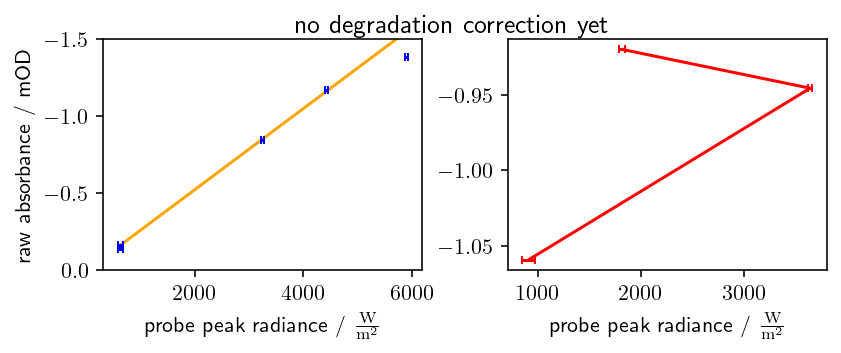

In [71]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
from scipy import io
import numpy as np
import json

import plotHelperLatex
plotHelperLatex.setMatplotSettings()

#From 2023.12.22 PumpPowerVar in pump 653 Probe 680
#2nd-x;170.98460380387596;4.882207633023595;1.0;0.0;3.5228
#2nd-x Error;0.044586461622659335;0.10565856496080137;60.88881374774401;1.876611874015875;3.5228
#2nd-y;123.76193757659699;5.398671742339542;1.0;0.0;3.5228
#2nd-y Error;0.007988920725724555;0.018944810621290376;10.67173147785706;0.31277821947196766;3.5228

file = open(r"c:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar\TAfitPump653Probe680_OUTPUT.JSON")
entries = json.load(file)['entries']
entries_files = []
dOD = []
for entry in entries:
    entries_files.append(entry['inputFile'])
    dOD.append([entry['popt'][2], np.sqrt(entry['pcov'][2][2])])

dOD = np.array(dOD)
dOD[dOD == np.inf] = np.NaN
#print(dOD)
#these are in order
pumpRad = np.array([[620, 43], [620, 43], [620, 43], [3250, 30], [4430,30], [5900, 30], [4430, 30], [4430, 30], [4430, 30]])
probeRad = np.array([[910, 100], [1820, 60], [460, 100], [460, 100], [460, 100], [460, 100], [910, 60], [3640, 20], [1820, 30]])


#try calculating a fun correction factor based on the first 3 measurements that have identical pump radiance
#need to take the times such as done in degradation
io.loadmat(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar\saturation_2023-12-22_11-47.mat")
#print(np.polyfit(pumpRad[2:6,0], dOD[2:6,0], 1, cov=True))
linParameter = np.polyfit(pumpRad[2:5,0], dOD[2:5,0], 1)
#print(pumpRad[])
#Plot first 6 points as they should have relatively little sample degradation, because of their order and the pump power
fig, ax = plt.subplots(1,2, figsize=plotHelperLatex.figSizer(1,2.6), dpi = 144)
plt.tight_layout()
#ax[0].plot(pumpRad[:6,0], dOD[:6,0], 'b.')
#yerror of dOD fitting is not sensible
ax[0].plot(pumpRad[(0,5),0], np.polyval(linParameter, pumpRad[(0,5),0]), 'orange')
ax[0].errorbar(pumpRad[:6,0], dOD[:6,0], xerr = pumpRad[:6,1], ls = "None", ecolor = 'b', capsize = 2)

ax[0].set_xlabel(r'probe peak radiance / $\mathrm{\frac{W}{m^2}}$')
ax[0].set_ylabel('raw absorbance / mOD')
ax[0].set_ylim([0,-1.5])
ax[1].plot(probeRad[6:,0], dOD[6:,0], 'r')
ax[1].errorbar(probeRad[6:,0], dOD[6:,0], xerr = probeRad[6:,1], ls="None", ecolor = "r", capsize = 2)
ax[1].set_xlabel(r'probe peak radiance / $\mathrm{\frac{W}{m^2}}$')
fig.suptitle('no degradation correction yet')
plt.show()

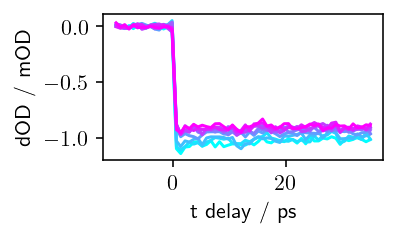

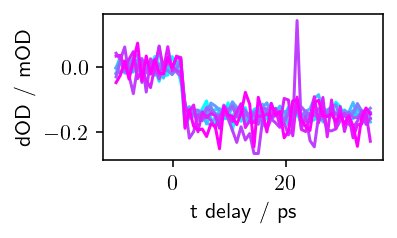

In [1]:
import sys
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
sys.path.insert(1, r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm")
from ShowDelayScan import main

#this is the constant pump power and probe power variation
filenames=[]
for x in range(6645,6654,1):
    filenames.append("TA_fourier_%4d" %(x))
dirPath = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar"
main(filenames, dirPath, plotHelperLatex.figSizer(2), False)

filenames=[]
for x in range(6615,6621,1):
    filenames.append("TA_fourier_%4d" %(x))
for x in range(6630,6633,1):
    filenames.append("TA_fourier_%4d" %(x))
main(filenames, dirPath, plotHelperLatex.figSizer(2), False)

### Degradation

(10, 3)
[3.11697475e-05]
[0.00247586]


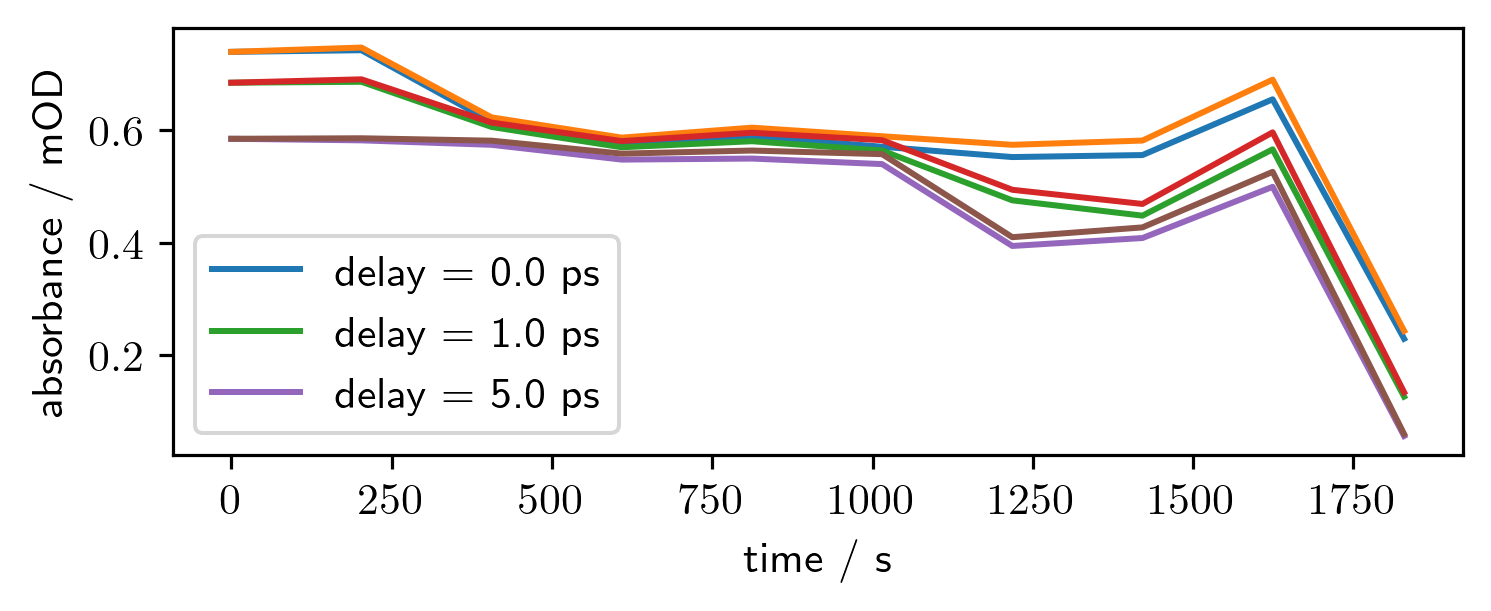

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
from scipy import io 
import os
import numpy as np
from datetime import timedelta
import json
from scipy.optimize import curve_fit

import plotHelperLatex
plotHelperLatex.setMatplotSettings()

def parseTime(time):
    '''takes time in hh:mm:ss and returns a value in s'''
    if type(time) == str():
        times = np.zeros(len(time), dtype = int)
        hh, mm, ss = float(str(time[0]).split(":"))
    else:
        print(np.shape(time))
        times = np.zeros(np.shape(time)[0])
        hh = time[:,0]
        mm = time[:,1]
        ss = time[:,2]

    times[0] = int(hh[0])*3600+int(mm[0])*60+int(ss[0])
    for i in range(1,np.shape(time)[0],1):
        #hh, mm, ss = str(time[i+1]).split(":")
        times[i] = int(hh[i])*3600+int(mm[i])*60+int(ss[i]) - times[0]

    times[0] = 0
    return times

def parseSummaryFileToArray(filenameArray, directoryPath=r""):
    '''takes or filearray and returns T, delay'''
    if type(filenameArray) != type(str()):
        filenames = filenameArray
    else:
        summaryfile = io.loadmat(directoryPath + filenameArray)
        directoryPath = os.path.dirname(os.path.abspath(filenameArray))
        filenames = summaryfile['filenames'][0,:]



    for ind, file in enumerate(filenames):
        tempFile = io.loadmat(directoryPath + r'\\' + file[0])
        delay = tempFile['delay'][0]
        if ind == 0:
            datArray = np.zeros((len(filenames), len(delay)))
        datArray[ind, :] = tempFile['d_vec']        
    return datArray, delay   
        
def getTimes(filepath):
    '''moved out of degradationCompensation for general use'''
    tempLoad = io.loadmat(filepath)
    #test if file has keys for single TA measurement

    if 'delay' in tempLoad.keys() and 'd_vec' in tempLoad.keys():
        #this part can easily be broken by a matlab update
        #load time
        timeString = str(tempLoad['__header__']).split("Created on: ")[1]
        timeString = timeString.split(' ')[3]
        #print(timeString)
        subTimes = np.zeros((1,3), dtype=float)
        subTimes[:] = timeString.split(':')[:3]

    elif 'dates' in tempLoad.keys():
        subDates = tempLoad['dates'][0]
        subTimes = np.zeros((len(subDates), 3), dtype=float)
        for ind, timeArray in enumerate(subDates):
            #print(timeArray[0][3:6])
            timeArray = timeArray[0][3:6]
            #print(timeArray)
            subTimes[ind,0] = timeArray[0]#hh
            subTimes[ind,1] = timeArray[1]##mm
            subTimes[ind,2] = timeArray[2]##ss with miliseconds
    return subTimes
    
def degradationCompensation(degradePerSecond, times, powerDensities=1):
    '''returns correction factor for each measurement\\
        degradePerSecond is a linear fit of degradation per second per W/m^2 peak\\
        filepathArray is ordered array of measurements after each other\\
        powerdensities is either a single number (int/float) or array of powerdensities of size of filepathArray\\
        not optimal but a linear approximation is about as good as I can do it with the data available'''

    meanTime = 0
    for i in range(len(times)-1):
        meanTime = times[i+1]-times[i]
        meanTime = meanTime/(len(times)-1)
        
    degradationCorrection = np.zeros(len(times))

    
    if type(powerDensities) == type(int()):
        powerDensities = np.ones(np.shape(times)[0])
        

    degradationCorrection= 1/(1-degradePerSecond*times*powerDensities)
        
    return degradationCorrection

def fitDegradation(inputArray, times, powerDensity=1, sliding_window_len = 5):
    '''only works for single series without interruptions'''
    #find the mean time to adjust for the final part of the measurement
    for i in range(len(times)-1):
        dtime = times[i+1]-times[i]
    dtime = dtime/(len(times)-1)
    times = np.array(times)

    working_array = np.zeros((len(times), np.shape(inputArray)[1]-sliding_window_len+1))
    for i in range(len(times)):
        working_array[i,:] = np.convolve(inputArray[i,:], np.ones(sliding_window_len)/sliding_window_len, mode = 'valid')


    def costFunction(times, degFactor):
        time_fit = lambda time, degConstant, startValue: startValue-time*degConstant
        residual = 0
        startVal = inputArray[0,:]
        for delayInd in range(np.shape(inputArray)[1]):
            residual += abs(np.sum(inputArray[:,delayInd]-time_fit(times, degFactor, startVal[delayInd])))**2
        return residual

    popt, pcov = curve_fit(costFunction, times, np.zeros(np.shape(inputArray)[0]), p0 = [1e4], bounds=[0,1e6])

    return popt, pcov


def removeBackground(T, numEntries: int = 20) -> float:
    backgroundLevel = np.mean(T[:numEntries])
    T += 1 - backgroundLevel
    A = -1000 * np.log10(T)
    return T, A, backgroundLevel
    


testArray = [r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\TA_fourier_6778.mat", 
             r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\TA_fourier_6779.mat"]
#degradationCompensation(1, [r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\saturation_2024-01-19_16-14.mat"], 1)
#degradationCompensation(1, testArray, 1)

#to be tested yet
#refits of this are useless so far...
dArray, delay = parseSummaryFileToArray(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\saturation_2024-01-19_16-14.mat")


powerVar = pd.read_excel("CorrectedPump653ProbeWavelengthScan_UV-extended.xlsx", sheet_name='Degradation493nm')
dtime = getTimes(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\saturation_2024-01-19_16-14.mat")
dtime = parseTime(dtime)
#dOD = powerVar['dOD / mOD']

dArray, aArray, _ = removeBackground(dArray, 20)
special_indexing = np.array([1,2,3,4])
#popt, pcov = fitDegradation(aArray[special_indexing,:], dtime[special_indexing])
popt, pcov = fitDegradation(aArray[:,:], dtime[:])
#popt, pcov = fitDegradation(aArray[3:,:], dtime[3:])
print(popt)
print(np.sqrt(pcov[0]))

file = open(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\TAfitPump653Probe493_OUTPUT.JSON")
entries = json.load(file)['entries']
entries_files = []
timeAt = np.array([0,1e3,5e3]) #fs
dOD = np.zeros((len(entries), len(timeAt)))
expDecay = lambda ampTau1, ampTau2, t: ampTau1[0]*np.exp(-t/ampTau1[1])+ampTau2[0]*np.exp(-t/ampTau2[1])

for ind, entry in enumerate(entries):
    entries_files.append(entry['inputFile'])
    for indTime, time in enumerate(timeAt):
        dOD[ind,indTime] = expDecay(entry['popt'][2:4], entry['popt'][4:6], time)


dOD = np.array(dOD)
dOD[dOD == np.inf] = np.NaN


fig, ax = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(1,3), dpi = 288)
for i in range(len(timeAt)):
    ax.plot(dtime, dOD[:,i], label="delay = %.1f ps" %(timeAt[i]*1e-3))
    ax.plot(dtime, dOD[:,i]*degradationCompensation(popt, dtime))
#ax.plot(dtime, dOD[0,2]-dtime*popt)
ax.legend()
ax.set_xlabel('time / s')
ax.set_ylabel('absorbance / mOD')

plt.show()

In [ ]:
import SeriesDegradation
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

start = 6778
stop = 6787
dirPath = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\\"
SeriesDegradation.plotTrend(dirPath, start, stop, plotHelperLatex.figSizer(1))

### Correction value check

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
import numpy as np
from datetime import timedelta
import sys
import json
sys.path.insert(1, r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm")
from peakRadianceAuto import autoPeakRadiance
from ArtrayAnalysis import ArtFit

def correctionFactorWithError(pathJSON, fittingPath):
    '''Returns correction factor with uncertainty in dOD per W/m^2\\
        pathJSON is to summary\\
            fittingPath is to standard fit.txt (2 beam pointspreads supported)'''
    #don't care about loading these multiple times
    #returns first 
    peakRad, dPeakRad = autoPeakRadiance(pathJSON, fittingPath)
    #only choose pump
    peakRad = peakRad[1]
    dPeakRad = dPeakRad[1]
    #dict with {"pump/probe": {"x/y" : [[sig, error],...]}}
    dataDict = ArtFit.parseFitFile(fittingPath)

    pump = dataDict["pump"]
    probe = dataDict["probe"]
    #coeffs = x_center, sig, Amplitude, offset
    #sig1Error = lambda corr, sig1, sig2, muDiff, dsig1 : dsig1*corr*(sig1**3/sig2**2+sig1+muDiff**2*sig1/(sig1**2+sig2**2)**2)
    #sig2Error = lambda corr, sig1, sig2, muDiff, dsig2: dsig2*corr*((sig1**2+sig2**2)/sig2 + muDiff**2*sig2/(sig1**2+sig2**2)**2)
    #muDiffError = lambda corr, sig1, sig2, muDiff, dmuDiff: dmuDiff*corr*muDiff/(sig1**2+sig2**2)

    sig1Error = lambda corr, coeffs1, coeffs2: coeffs1[1,1]*corr*(coeffs1[1,0]**3/coeffs2[1,0]**2+coeffs1[1,0]+(coeffs1[0,0]-coeffs2[0,0])**2*coeffs1[1,0]/(coeffs1[1,0]**2+coeffs2[1,0]**2)**2)
    sig2Error = lambda corr, coeffs1, coeffs2: coeffs2[1,1]*corr*((coeffs1[1,0]**2+coeffs2[1,0]**2)/coeffs2[1,0]+ (coeffs1[0,0]-coeffs2[0,0])**2*coeffs2[1,0]/(coeffs1[1,0]**2+coeffs2[1,0]**2)**2)
    #using compound error for this one
    muDiffError = lambda corr, coeffs1, coeffs2: (coeffs1[0,1]+coeffs2[0,1])*corr*(coeffs1[0,0]-coeffs2[0,0])/(coeffs1[1,0]**2+coeffs2[1,0]**2)
    #simplification
    fullError = lambda corr, coeffs1, coeffs2: sig1Error(corr, coeffs1, coeffs2) + sig2Error(corr, coeffs1, coeffs2) + muDiffError(corr, coeffs1, coeffs2)
    #takes pump then probe
    xCorr = ArtFit.calculateOverlapCorrection(pump["x"][:,0], probe["x"][:,0], 5)
    dXCorr = fullError(xCorr, pump['x'], probe['x'])
    yCorr = ArtFit.calculateOverlapCorrection(pump["y"][:,0], probe["y"][:,0], 5)
    dYCorr = fullError(xCorr, pump['y'], probe['y'])
    totalCorr = xCorr*yCorr/peakRad
    totalError = (xCorr*dYCorr+yCorr*dXCorr)/peakRad + totalCorr*dPeakRad/peakRad**2
    #print(totalCorr)
    #print(totalError)
    sigCalc = lambda probeCoeff, pumpCoeff: [probeCoeff[1,0]/pumpCoeff[1,0], probeCoeff[1,1]/pumpCoeff[1,0] + probeCoeff[1,0]/pumpCoeff[1,0]**2*pumpCoeff[1,1]]
    sigbysig = np.array([sigCalc(probe['x'], pump['x']), sigCalc(probe['y'], pump['y'])], dtype = float)
    dmu = np.array([[abs(probe["x"][0,0]-pump["x"][0,0]), probe["x"][0,1]+pump["x"][0,1]],[abs(probe["y"][0,0]-pump["y"][0,0]), probe["y"][0,1]+pump["y"][0,1]]], dtype = float)
    return [totalCorr, totalError], sigbysig, dmu



file = open(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_ArtrayCompensationControl\TAfitPump653Probe493_OUTPUT.JSON")
entries = json.load(file)['entries']
entries_files = []
dOD = []
for entry in entries:
    entries_files.append(entry['inputFile'])
    dOD.append([entry['popt'][2]+ entry['popt'][4], entry['pcov'][2][2]+entry['pcov'][4][2]])

dOD = np.array(dOD)
dOD[dOD == np.inf] = np.NaN



basepath = lambda filename: r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_ArtrayCompensationControl" + filename
inputFiles = [(r"\SummaryPump653Probe493Caution.JSON", r"\BeamFitsPump653Probe493Caution.txt"),
              (r"\SummaryPump653Probe493_ShiftedProbe.JSON", r"\BeamFitsPump653Probe493_ShiftedProbe.txt"),
              (r"\SummaryPump653Probe493_WideProbe.JSON", r"\BeamFitsPump653Probe493_WideProbe.txt"),
              (r"\SummaryPump653Probe493_ThinProbe.JSON", r"\BeamFitsPump653Probe493_ThinProbe.txt")]
labels = ["standard", "shifted", "wide probe", "thin probe"]
correctionFactors = np.zeros((4,2))
dmu = np.zeros((4,2,2))
sigbysig = np.zeros((4,2,2))




for index, shortPath in enumerate(inputFiles):
    correctionFactors[index,:], sigbysig[index], dmu[index] = correctionFactorWithError(basepath(shortPath[0]), basepath(shortPath[1]))
    print("xsigRatio: %.3e +- %.3e, xdmu: %.3e +- %.3e" %(sigbysig[index, 0,0], sigbysig[index, 0,1], dmu[index, 0,0], dmu[index, 0,1]))
    print("ysigRatio: %.3e +- %.3e, ydmu: %.3e +- %.3e" %(sigbysig[index,1,0], sigbysig[index,1,1], dmu[index,1,0], dmu[index,1,1]))
    print("%s: %.3e +- %.3e dOD per W/msquare" %(labels[index], correctionFactors[index,0]*dOD[index, 0], correctionFactors[index,1]*dOD[index, 0]))




Peak radiance for signal 0 is (388.89 +- 163.9) W/m^2
Peak radiance for signal 1 is (1531.74 +- 530.6) W/m^2
xsigRatio: 8.887e-01 +- 1.862e-02, xdmu: 3.129e-01 +- 4.182e-02
ysigRatio: 7.091e-01 +- 4.478e-03, ydmu: 2.493e-01 +- 1.417e-02
standard: 7.563e-04 +- 2.259e-04 dOD per W/msquare
Peak radiance for signal 0 is (381.74 +- 161.5) W/m^2
Peak radiance for signal 1 is (1572.74 +- 541.9) W/m^2
xsigRatio: 8.967e-01 +- 1.884e-02, xdmu: 3.000e+00 +- 4.240e-02
ysigRatio: 7.351e-01 +- 4.322e-03, ydmu: 1.530e-01 +- 1.244e-02
shifted: 4.486e-04 +- 1.525e-04 dOD per W/msquare
Peak radiance for signal 0 is (124.66 +- 53.3) W/m^2
Peak radiance for signal 1 is (1552.70 +- 534.3) W/m^2
xsigRatio: 1.642e+00 +- 3.318e-02, xdmu: 2.982e-02 +- 5.063e-02
ysigRatio: 1.214e+00 +- 1.290e-02, ydmu: 1.219e-01 +- 3.098e-02
wide probe: 6.679e-04 +- 2.524e-04 dOD per W/msquare
Peak radiance for signal 0 is (604.44 +- 257.6) W/m^2
Peak radiance for signal 1 is (1565.78 +- 540.1) W/m^2
xsigRatio: 7.172e-01 +- 1.4